<img src="images/Qiskit.png" width="500 px" align="left">

# Programming a Quantum Computer 
## Jay Gambetta
## IBM Fellow, Quantum Computing 

www.qiskit.org An open source quantum computing framework for writing quantum experiments, programs, and applications

In [1]:
import slides

Hello Reflections|Projections ... 


In [2]:
slides.lab()

In [3]:
slides.system()

In [4]:
slides.transmon()

In [5]:
slides.ibmqx()

True

In [6]:
slides.qiskit()

True

In [7]:
slides.elements()

In [8]:
slides.git()

True

In [9]:
from qiskit import IBMQ
IBMQ.load_accounts()

In [10]:
IBMQ.backends()

[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmqx5') from IBMQ()>,
 <IBMQBackend('ibmqx2') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>]

In [11]:
IBMQ.backends(n_qubits=5)

[<IBMQBackend('ibmqx4') from IBMQ()>, <IBMQBackend('ibmqx2') from IBMQ()>]

In [12]:
from qiskit.backends.ibmq import least_busy
least_busy(IBMQ.backends(n_qubits=5))

<IBMQBackend('ibmqx4') from IBMQ()>

In [13]:
for backend in IBMQ.backends(simulator=False):
    print(backend.status())

{'pending_jobs': 5, 'name': 'ibmqx4', 'operational': True}
{'pending_jobs': 8, 'name': 'ibmqx5', 'operational': False}
{'pending_jobs': 0, 'name': 'ibmqx2', 'operational': False}
{'pending_jobs': 0, 'name': 'ibmq_16_melbourne', 'operational': True}


In [14]:
slides.ibmq_qcc()

In [15]:
slides.quantum()

thanks omgcatsinspace for the permission to use the quantum cat

In [16]:
slides.model()

In [17]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer, plot_state
from qiskit import Aer

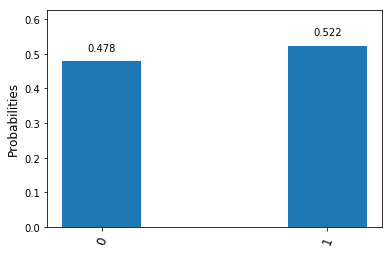

In [18]:
# Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

# Build the circuit
qc = QuantumCircuit(q, c)
qc.h(q)

#-----

qc.measure(q, c)

# Execute the circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()

# Display the result
plot_histogram(result.get_counts(qc))

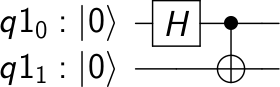

In [19]:
# Quantum Registers
q = QuantumRegister(2)

# Build the circuit
bell = QuantumCircuit(q)
bell.h(q[0])
bell.cx(q[0], q[1])

# Draw the circuit
circuit_drawer(bell)

In [20]:
c2 = ClassicalRegister(2)

# Measurement in standard basis
meas_zi = QuantumCircuit(q, c) 
meas_zi.measure(q[0], c[0])

# Measurement in superposition basis
meas_xi = QuantumCircuit(q, c)
meas_xi.h(q[0])
meas_xi.measure(q[0], c[0])

# Joint measurement in standard basis
meas_zz = QuantumCircuit(q, c2) 
meas_zz.measure(q, c2)

# Joint measurement in superposition basis
meas_xx = QuantumCircuit(q, c2) 
meas_xx.h(q)
meas_xx.measure(q, c2)

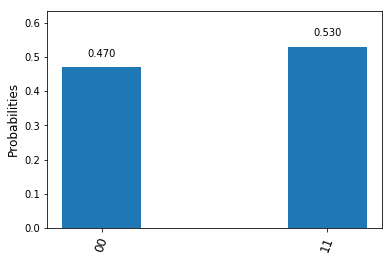

In [21]:
# Execute the circuit
qc = bell+meas_xx
result = execute(qc, backend, shots=1000).result()

# Display the result
plot_histogram(result.get_counts(qc))

running it on  ibmq_16_melbourne
Status @ 0 seconds
JobStatus.INITIALIZING
None
JobStatus.DONE


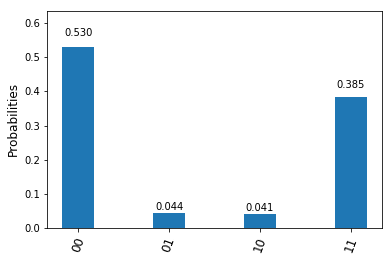

In [22]:
# let's choose a device and 
device = least_busy(IBMQ.backends(simulator=False))
print('running it on ', device)
qc = bell+meas_zz
job = execute(qc, device)

import time
lapse = 0
interval = 60
while job.status().name != 'DONE':
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status())
    print(job.queue_position())
    time.sleep(interval)
    lapse += 1
print(job.status())
    
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram(device_counts)

In [23]:
# Build the circuit
superpositon = QuantumCircuit(q) 
oracle = QuantumCircuit(q) 
amplitude_amp = QuantumCircuit(q) 


#Make superposition off all
superpositon.h(q)

#encode the oracle 
test = '01'
if test == '00':
    oracle.z(q)
    oracle.cz(q[0], q[1])   
if test == '10':
    oracle.z(q[1])
    oracle.cz(q[0], q[1])  
if test == '01':
    oracle.z(q[0])
    oracle.cz(q[0], q[1])    
if test == '11':
    oracle.cz(q[0], q[1])


#amplitude amplifcation
amplitude_amp.h(q)
amplitude_amp.z(q)
amplitude_amp.cz(q[0], q[1])
amplitude_amp.h(q)


grover = superpositon+oracle+amplitude_amp

qc = grover+meas_zz

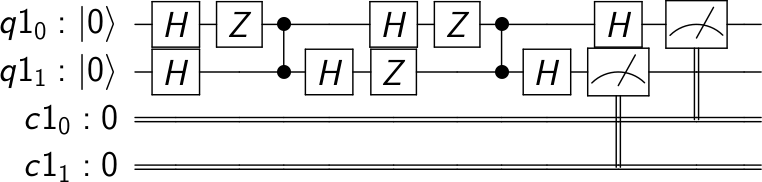

In [24]:
circuit_drawer(qc)

In [25]:
# Execute the circuit
result = execute(qc, backend, shots=1).result()

print(result.get_counts(qc))

{'01': 1}


running it on  ibmq_16_melbourne
Status @ 0 seconds
JobStatus.INITIALIZING
None
JobStatus.DONE


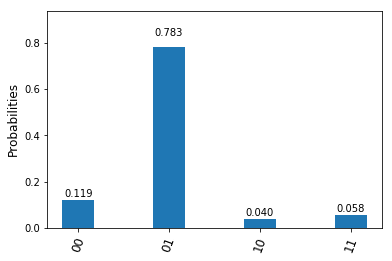

In [26]:
# let's choose a device and 
device = least_busy(IBMQ.backends(simulator=False))
print('running it on ', device)
qc = grover+meas_zz
job = execute(qc, device)

lapse = 0
interval = 60
while job.status().name != 'DONE':
    print('Status @ {} seconds'.format(interval * lapse))
    print(job.status())
    print(job.queue_position())
    time.sleep(interval)
    lapse += 1
print(job.status())
    
device_result = job.result()
device_counts = device_result.get_counts()
plot_histogram(device_counts)

In [27]:
from qiskit.extensions import simulator

snapshots = ['0','1','2']

superpositon.snapshot(snapshots[0])
oracle.snapshot(snapshots[1])
amplitude_amp.snapshot(snapshots[2])

grover_with_snapshot = superpositon+oracle+amplitude_amp

# Execute the circuit
backend_state = Aer.get_backend('statevector_simulator')
result = execute(grover_with_snapshot, backend_state).result()

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


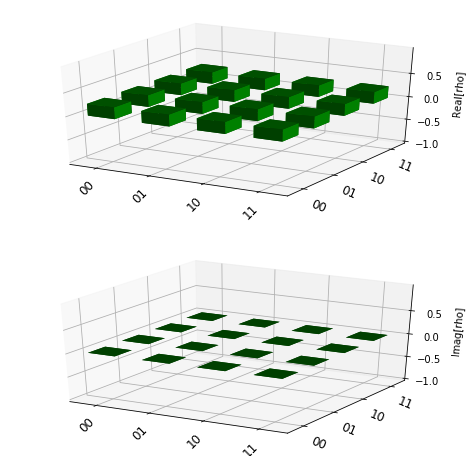

[ 0.5+0.j -0.5+0.j  0.5+0.j  0.5+0.j]


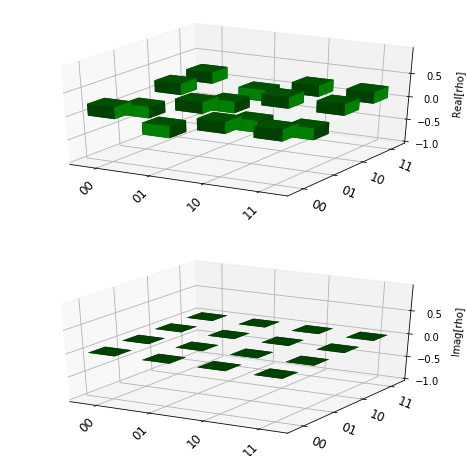

[ 0.+0.j  1.-0.j -0.+0.j  0.+0.j]


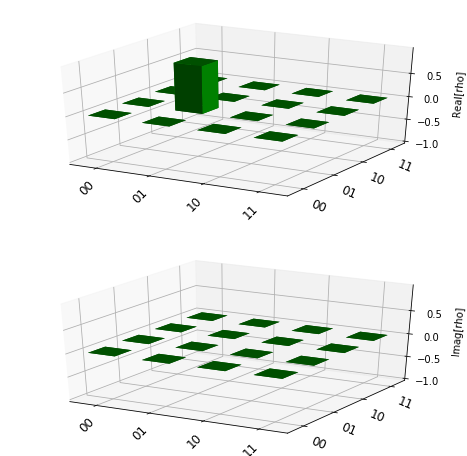

In [28]:
import numpy as np

state = result.get_snapshot(snapshots[0], grover_with_snapshot)

print(state.round(2))
plot_state(np.outer(state, state.conj()))

state = result.get_snapshot(snapshots[1], grover_with_snapshot)
print(state.round(2))
plot_state(np.outer(state, state.conj()))

state = result.get_snapshot(snapshots[2], grover_with_snapshot)
print(state.round(2))
plot_state(np.outer(state, state.conj()))

In [29]:
slides.entanglement()

In [30]:
slides.aqua()

In [31]:
from collections import OrderedDict

from qiskit_aqua_chemistry.drivers import ConfigurationManager
from qiskit_aqua_chemistry.core import get_chemistry_operator_instance
from qiskit_aqua_chemistry import FermionicOperator

In [32]:
cfg_mgr = ConfigurationManager()
pyscf_cfg = OrderedDict([
    ('atom', 'H .0 .0 .0; H .0 .0 0.735'),
    ('unit', 'Angstrom'),
    ('basis', 'sto3g')
])
driver = cfg_mgr.get_driver_instance('PYSCF')
h2molecule = driver.run({'properties': pyscf_cfg})

In [33]:
h2molecule._one_body_integrals

array([[-1.25633907,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.47189601,  0.        ,  0.        ],
       [ 0.        ,  0.        , -1.25633907,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.47189601]])

In [34]:
# get fermionic operator and mapping to qubit operator
ferOp = FermionicOperator(h1=h2molecule._one_body_integrals, h2=h2molecule._two_body_integrals)
qubitOp = ferOp.mapping(map_type='PARITY', threshold=0.00000001)
qubitOp = qubitOp.two_qubit_reduced_operator(2)
print(qubitOp.print_operators())

II	(-1.052373245772859+0j)
ZI	(0.3979374248431805+0j)
IZ	(-0.3979374248431805+0j)
ZZ	(-0.011280104256235435+0j)
XX	(0.18093119978423153+0j)



In [35]:
from qiskit_aqua import run_algorithm
from qiskit_aqua.input import get_input_instance

In [36]:
params = {
    'algorithm': {'name': 'VQE'},
    'backend': {'name': 'statevector_simulator'}
}
algo_input = get_input_instance('EnergyInput')
algo_input.qubit_op = qubitOp  
result = run_algorithm(params, algo_input)

In [37]:
print(result['energy'])

-1.8572750301268945


In [38]:
slides.execution()

In [39]:
slides.papers()

In [40]:
slides.community()

In [41]:
slides.thanks()